In [3]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [4]:
def por(gs):
    return 5.86-0.0226*gs

In [5]:
def dif(gf,ass,amm,esp):
    return 5.83 + 0.15*gf + 0.06*ass - 0.02*amm - 0.1*esp

In [6]:
def cen(gf,ass,amm):
    return 5.9 + 0.12*gf + 0.055*ass - 0.02*amm

In [7]:
def att(gf,ass,amm):
    return 5.925 + 0.105*gf + 0.06*ass - 0.028*amm

# Portieri

In [8]:
p1 = [5.5, 35]
p2 = [5.3, 20]
p3 = [4.75, 5]

In [9]:
p = [p1,p2,p3]

# Difensori

In [10]:
d1 = [dif(4,5,2,0), 35] # terzino offensivo
d2 = [6.1, 22] # centrale forte
d3 = [dif(1,4,2,0), 10] # terzino titolare squadra medio-forte
d4 = [6.2, 8] # centrale squadra medio-forte (es Lazio, Atalanta)
d5 = [5.7, 1] # resto-terzini
d6 = [5.7, 1] # resto-centrali

In [11]:
d = [d1, d2, d3, d4, d5, d6]

# Centrocampisti

In [12]:
c1 = [7.5, 95] # Kvara, Chiesa
c2 = [7.4, 80] # SMS
# Zaccagni?
c3 = [6.9, 50] # Trequartisti forti: Pellegrini, Chala, Felipe, Zielinski, Barella, Koop
c4 = [6.5, 18] # Mediani forti: Brozo, Locatelli, Anguissa, Tonali, Bennacer, Lobotka
c5 = [6.4, 20] # Trequartisti medi: Miranchuk, Zaniolo, Bajrami, CDK, Barak, Luis Alberto, Pereyra
c6 = [5.8, 1] # Resto

In [13]:
c = [c1, c2, c3, c4, c5, c6]

# Attaccanti

In [14]:
a1 = [9, 210] # Osimhen, Vlahovic, Immobile, Lukaku?
a2 = [8.2, 180] # Lautaro, Abraham, Dybala
a3 = [7.8, 140] # Leao
a4 = [7, 80] # Arnautovic, Giroud, Zapata, Berardi, Milik, Beto
a5 = [6.5, 35] # Deulofeu, Pedro, Di Maria, Sanabria, Gonzalez, Cabral 
a6 = [6, 1] # Resto 

In [15]:
a = [a1, a2, a3, a4, a5, a6]

# Optimization

In [16]:
t1 = [p, d, c, a]
t2 = sum(t1, [])
tot = np.array(t2)

In [17]:
val = tot[:,0]
cost = tot[:,1]

In [18]:
n = len(tot)
c = -val
l1 = np.array(9*[0]+[1]+(n-10)*[0])
l2 = np.array(10*[0]+[1]+(n-11)*[0])
l3 = np.array(17*[0]+[1]+(n-18)*[0])
A_ub = np.concatenate((cost,l1,l2,l3)).reshape((4,n))
b_ub = np.array([485,2,1,1])

l4 = np.array(3*[1]+(n-3)*[0])
l5 = np.array(3*[0]+6*[1]+(n-9)*[0])
l6 = np.array(9*[0]+6*[1]+(n-15)*[0])
l7 = np.array(15*[0]+(n-15)*[1])
A_eq = np.concatenate((l4,l5,l6,l7)).reshape((4,n)) # 433 formation
b_eq = np.array([1,3,4,3])

In [19]:
from scipy.optimize import linprog
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, integrality=1)

In [20]:
res.x

array([0., 1., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 1., 0.,
       0., 0., 2., 0.])

In [21]:
res.fun

-73.37

# General Function

In [22]:
def f(formazione, crediti):
    
    x = formazione
    z = crediti
    
    # Portieri
    
    p1 = [5.5, 35]
    p2 = [5.3, 20]
    p3 = [4.75, 5]

    p = [p1,p2,p3]

    # Difensori

    d1 = [dif(4,5,2,0), 35] # terzino offensivo
    d2 = [6.1, 22] # centrale forte
    d3 = [dif(1,4,2,0), 10] # terzino titolare squadra medio-forte
    d4 = [6.2, 8] # centrale squadra medio-forte (es Lazio, Atalanta)
    d5 = [5.7, 1] # resto-terzini
    d6 = [5.7, 1] # resto-centrali

    d = [d1, d2, d3, d4, d5, d6]
    
    # Centrocampisti
    
    c1 = [cen(10,8,2), 95] # Kvara, Chiesa
    c2 = [cen(8,8,3), 80] # SMS
    # Zaccagni?
    c3 = [cen(5,6,3), 50] # Trequartisti forti: Pellegrini, Chala, Felipe, Zielinski, Barella, Koop
    c4 = [6.35, 18] # Mediani forti: Brozo, Locatelli, Anguissa, Tonali, Bennacer, Lobotka
    c5 = [cen(3,5,2), 20] # Trequartisti medi: Miranchuk, Zaniolo, Bajrami, CDK, Barak, Luis Alberto, Pereyra
    c6 = [5.8, 1] # Resto

    c = [c1, c2, c3, c4, c5, c6]

    # Attaccanti

    a1 = [9, 210] # Osimhen, Vlahovic, Immobile, Lukaku?
    a2 = [8.2, 180] # Lautaro, Abraham, Dybala
    a3 = [att(10,8,2), 140] # Leao
    a4 = [att(10,3,3), 80] # Arnautovic, Giroud, Zapata, Berardi, Milik, Beto
    a5 = [att(4,4,2), 35] # Deulofeu, Pedro, Di Maria, Sanabria, Gonzalez, Cabral 
    a6 = [6, 1] # Resto 

    a = [a1, a2, a3, a4, a5, a6]
    names = ['p1','p2','p3','d1','d2','d3','d4','d5','d6','c1','c2','c3','c4','c5','c6',
            'a1','a2','a3','a4','a5','a6']

    # Building the matrices for optimization
    
    t1 = [p, d, c, a]
    t2 = sum(t1, [])
    tot = np.array(t2)

    val = tot[:,0]
    cost = tot[:,1]
    
    n = len(tot)
    c = -val
    l1 = np.array(9*[0]+[1]+(n-10)*[0])
    l2 = np.array(10*[0]+[1]+(n-11)*[0])
    l3 = np.array(17*[0]+[1]+(n-18)*[0])
    A_ub = np.concatenate((cost,l1,l2,l3)).reshape((4,n))
    b_ub = np.array([z,2,1,1])

    l4 = np.array(3*[1]+(n-3)*[0])
    l5 = np.array(3*[0]+6*[1]+(n-9)*[0])
    l6 = np.array(9*[0]+6*[1]+(n-15)*[0])
    l7 = np.array(15*[0]+(n-15)*[1])
    A_eq = np.concatenate((l4,l5,l6,l7)).reshape((4,n)) 
    
    if x == 343:
        b_eq = np.array([1,3,4,3])
        
    if x == 433:
        b_eq = np.array([1,4,3,3])
        
    if x == 352:
        b_eq = np.array([1,3,5,2])
        
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, integrality=1)
        
        # 4: Showing Results
        
    final_names = []
    for i in range(len(list(res.x))):
        if 0.9 < list(res.x)[i] < 10:
            final_names.append(int(res.x[i])*[names[i]])
                
        
    return [res.fun, final_names]

Max:  72.91300000000001
Max:  73.113
Max:  73.37400000000001
Max:  73.37400000000001
Max:  73.57400000000001


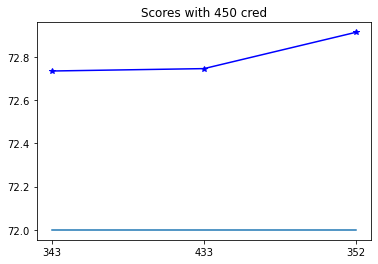

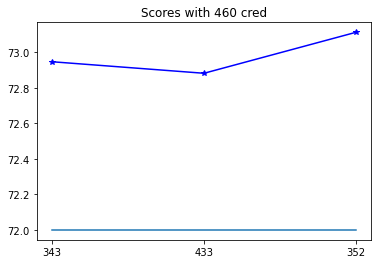

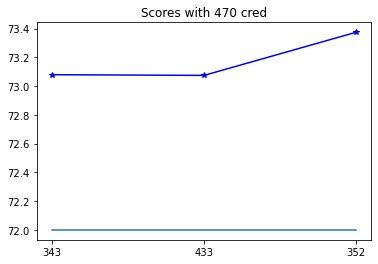

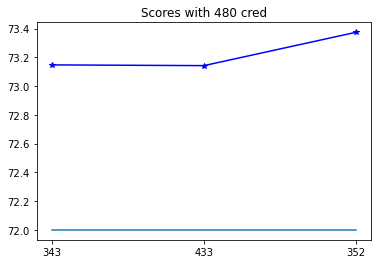

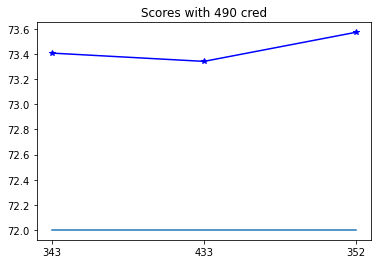

In [23]:
form = [343,433,352]
for cred in range(450,500,10):
    score = []
    for ff in form:
        score.append(-f(ff,cred)[0])
    plt.figure()
    plt.plot(score,'b*-')
    plt.plot(len(score)*[72])
    plt.title(f'Scores with {cred} cred')
    plt.xticks(range(3),form)
    print('Max: ', max(score))

In [24]:
f(352,450)

[-72.91300000000001,
 [['p2'], ['d1', 'd1', 'd1'], ['c1', 'c1'], ['c5', 'c5', 'c5'], ['a5', 'a5']]]